In [55]:
import torch
# 生成数据
x_data = torch.tensor([[1.0], [2.0], [3.0],[4]])
y_data = torch.tensor([[0.0],[0],[1],[1]])

x_data.shape, y_data.shape

(torch.Size([4, 1]), torch.Size([4, 1]))

In [56]:
import torch.nn.functional as F # 包含sigmoid、tanh等函数

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self) -> None: # F函数无参 所以无需另外的初始化 和线性回归一样
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [57]:
model = LogisticRegressionModel()  # 实例化; model也是callable; 

In [58]:
# 构建一个BCE尺度优化器
criterion = torch.nn.BCELoss(size_average=False) # 交叉熵；不求均值
# 构建一个SGD优化器对象，他知道对哪些权重做优化，学习率是多少
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# 训练过程
for epoch in range(10000):
    y_pred = model(x_data) # 前向传播
    loss = criterion(y_pred, y_data) # 计算损失
    print(epoch, loss) # loss打印是会自动调用__str__()

    optimizer.zero_grad() # 由反向传播计算grad需要梯度归零，否则会梯度累计
    loss.backward() # 反向传播
    optimizer.step() # 更新

# 输出权重和偏置
print('w= ', model.linear.weight.item())
print('b= ', model.linear.bias.item())


0 tensor(8.3318, grad_fn=<BinaryCrossEntropyBackward0>)
1 tensor(7.8750, grad_fn=<BinaryCrossEntropyBackward0>)
2 tensor(7.4283, grad_fn=<BinaryCrossEntropyBackward0>)
3 tensor(6.9933, grad_fn=<BinaryCrossEntropyBackward0>)
4 tensor(6.5717, grad_fn=<BinaryCrossEntropyBackward0>)
5 tensor(6.1653, grad_fn=<BinaryCrossEntropyBackward0>)
6 tensor(5.7760, grad_fn=<BinaryCrossEntropyBackward0>)
7 tensor(5.4058, grad_fn=<BinaryCrossEntropyBackward0>)
8 tensor(5.0567, grad_fn=<BinaryCrossEntropyBackward0>)
9 tensor(4.7306, grad_fn=<BinaryCrossEntropyBackward0>)
10 tensor(4.4289, grad_fn=<BinaryCrossEntropyBackward0>)
11 tensor(4.1529, grad_fn=<BinaryCrossEntropyBackward0>)
12 tensor(3.9030, grad_fn=<BinaryCrossEntropyBackward0>)
13 tensor(3.6794, grad_fn=<BinaryCrossEntropyBackward0>)
14 tensor(3.4814, grad_fn=<BinaryCrossEntropyBackward0>)
15 tensor(3.3077, grad_fn=<BinaryCrossEntropyBackward0>)
16 tensor(3.1568, grad_fn=<BinaryCrossEntropyBackward0>)
17 tensor(3.0267, grad_fn=<BinaryCrossEnt

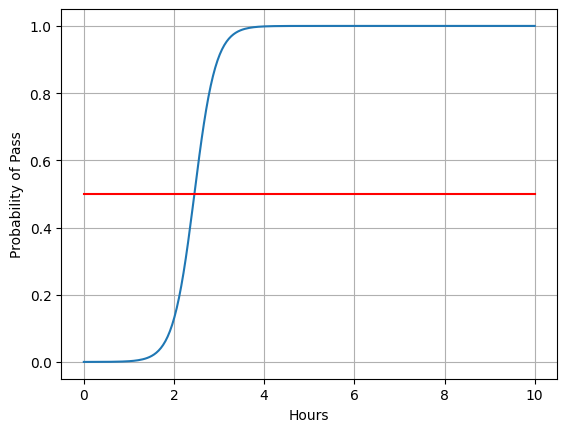

In [59]:
# 测试模型
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
x = np.float32(x)
x_test = torch.tensor(x).reshape((200,1)) 
y_test = model(x_test)
y = y_test.data.numpy()

plt.plot(x,y)
plt.plot([0,10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

